In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [13]:
fellowship_duration_months = 24 # months
fellowship_duration_weeks = 52*2
contract_hours = 44 #per work schedule document

total_fellowship_hours = fellowship_duration_weeks * contract_hours

print(f"Total fellowship duration in weeks: {fellowship_duration_weeks}")
print(f"Total fellowship duration in months: {fellowship_duration_months}")
print(f"Total fellowship hours: {total_fellowship_hours}")

Total fellowship duration in weeks: 104
Total fellowship duration in months: 24
Total fellowship hours: 4576


## Routine clinical work calculation

In [14]:
months_of_arcp_contribution_per_year_for_routine_clinical_work = 2.4 #at 1 day per week 0900-1700
number_of_arcp_contributors = 4

neuro_fellowship_contribution_from_routine_work_alone = months_of_arcp_contribution_per_year_for_routine_clinical_work * number_of_arcp_contributors
print(f"Neuro fellowship contribution from routine work alone: {neuro_fellowship_contribution_from_routine_work_alone} months")

proportion_of_fellowship_duration_contributed_by_routine_work = neuro_fellowship_contribution_from_routine_work_alone / fellowship_duration_months
print(f"Proportion of fellowship duration contributed by routine work: {proportion_of_fellowship_duration_contributed_by_routine_work:.2%}")

Neuro fellowship contribution from routine work alone: 9.6 months
Proportion of fellowship duration contributed by routine work: 40.00%


## On call work calculation

In [15]:
df = pd.read_csv('James_Ruffle_All_Shift Data.csv')
df = df.loc[df['Location']=='NHNN'] #remove contrast cover shifts as these are not training relevant
df = df[~((df['Day'].isin(['Monday','Tuesday','Wednesday', 'Thursday', 'Friday'])) & (df['StartTime'] == '09:00') & (df['EndTime'] == '17:00'))] #takes on call shifts only
df.reset_index(drop=True, inplace=True)
print('rows of on call:',df.shape[0])
df.head()

rows of on call: 193


,Date,Day,ShiftDesc,StartTime,EndTime,Break,Name,Grade,Vacancy Title,TimesheetNo,NoOfHours,VacancyTheirRef,ShiftOurRef,Hospital/Arm,Unit/Locality,ShiftType,Location
0,09/10/2021,Saturday,SPR Surgery Day,09:00,21:00,0,James Ruffle,SPR,Neuro Radiology NHNN (DRS),W8439198,12.0,443050,38200796,Specialist Hospitals,Queen Square,NaN,NHNN
1,10/10/2021,Sunday,SPR Surgery Day,09:00,21:00,0,James Ruffle,SPR,Neuro Radiology NHNN (DRS),W8439198,12.0,443050,38200797,Specialist Hospitals,Queen Square,NaN,NHNN
2,20/10/2021,Wednesday,SPR Surgery Day,17:00,21:00,0,James Ruffle,SPR,Neuro Radiology NHNN (DRS),W8506359,4.0,443050,38361771,Specialist Hospitals,Queen Square,NaN,NHNN
3,22/10/2021,Friday,SPR Surgery Night,21:00,09:00,0,James Ruffle,SPR,Neuro Radiology NHNN (DRS),W8506359,12.0,443050,38361902,Specialist Hospitals,Queen Square,Nights (Banks & PCH Only),NHNN
4,23/10/2021,Saturday,SPR Surgery Night,21:00,09:00,0,James Ruffle,SPR,Neuro Radiology NHNN (DRS),W8506359,12.0,443050,38361903,Specialist Hospitals,Queen Square,Nights (Banks & PCH Only),NHNN


In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

total_on_call_hours = df['NoOfHours'].sum()
print('Total on call hours worked:', total_on_call_hours)

# proportion = total_on_call_hours / (number_of_weeks * contract_hours)
proportion_of_fellowship_contributed_from_on_call_work = total_on_call_hours / total_fellowship_hours
print(f'Proportion of fellowship contributed from on call work: {proportion_of_fellowship_contributed_from_on_call_work:.2%}')

print(f'Equivalent months of fellowship contributed from on call work: {proportion_of_fellowship_contributed_from_on_call_work * fellowship_duration_months:.2f} months')

months_in_oncall_period = 48
print(f'Pseudo WTE for CCT calculation document: {((proportion_of_fellowship_contributed_from_on_call_work * fellowship_duration_months)/months_in_oncall_period)*100:.2f} %')

Total on call hours worked: 1216.3400000000001
Proportion of fellowship contributed from on call work: 26.58%
Equivalent months of fellowship contributed from on call work: 6.38 months
Pseudo WTE for CCT calculation document: 13.29 %


## Research OOPR contribution

In [17]:
research_months_contribution = 6 #in accordance with standard OOPR research time contributed to CCT per discussion with UCLH TPDs
# Calculate the proportion for research work
proportion_research = research_months_contribution / fellowship_duration_months

print(f"Research months contribution: {research_months_contribution} months")
print(f"Proportion of fellowship contributed from research work: {proportion_research:.2%}")

Research months contribution: 6 months
Proportion of fellowship contributed from research work: 25.00%


## Summation

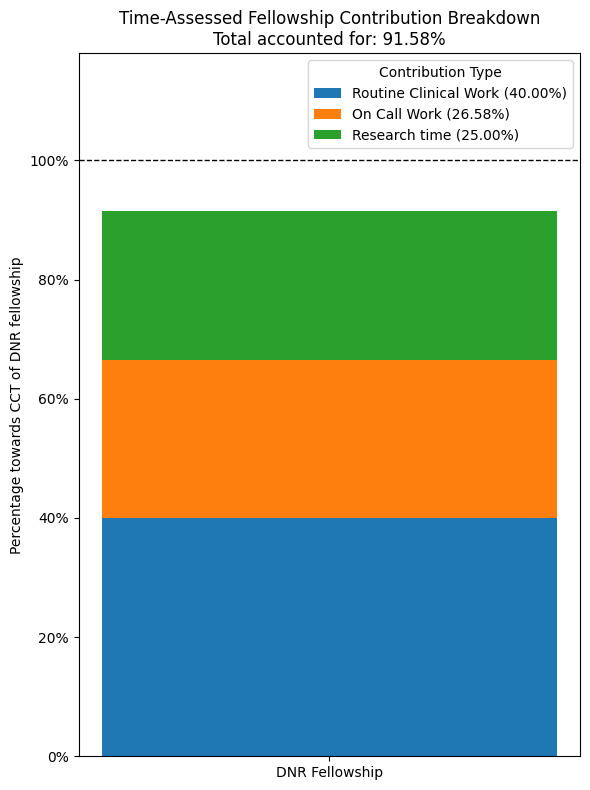

Total proportion of fellowship accounted for: 91.58%


In [18]:
# Create a DataFrame for plotting
data = {
    'Contribution Type': ['Routine Clinical Work', 'On Call Work', 'Research time'],
    'Proportion': [
        proportion_of_fellowship_duration_contributed_by_routine_work,
        proportion_of_fellowship_contributed_from_on_call_work,
        proportion_research
    ]
}
plot_df = pd.DataFrame(data)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 8))

# Plot each segment of the stacked bar
bottom = 0
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Default matplotlib colors
bar_width = 0.5 # Define bar width

for i, row in plot_df.iterrows():
    label_text = f"{row['Contribution Type']} ({row['Proportion']:.2%})"
    ax.bar('DNR Fellowship', row['Proportion'], bottom=bottom, label=label_text, color=colors[i], width=bar_width)
    bottom += row['Proportion']

# Add a horizontal line at 100%
ax.axhline(1, color='black', linestyle='--', linewidth=1)

# Set labels and title
ax.set_ylabel('Percentage towards CCT of DNR fellowship')
# ax.set_title('Fellowship Contribution Breakdown')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add legend
ax.legend(title="Contribution Type")

# Ensure the y-axis goes slightly above 100% if total is > 100% or to 100% if less
current_ylim = ax.get_ylim()
ax.set_ylim(0, max(1.18, bottom * 1.05, current_ylim[1]))

# Print the total proportion
total_proportion = proportion_of_fellowship_duration_contributed_by_routine_work + \
                   proportion_of_fellowship_contributed_from_on_call_work + \
                   proportion_research
# Update the title to include the total proportion
title_text = f'Time-Assessed Fellowship Contribution Breakdown\nTotal accounted for: {total_proportion:.2%}'
ax.set_title(title_text)

plt.tight_layout()
plt.show()

print(f"Total proportion of fellowship accounted for: {total_proportion:.2%}")

## Competency assessment

In [19]:
print('Total competency assessments required for DNR fellowship per TPD instruction')

normal_number_of_arcp_cycles = 2

dops_per_arcp_cycle = 6
ipx_per_arcp_cycle = 6
msf_per_arcp_cycle = 1
teaching_sessions_per_arcp_cycle = 2
mdt_per_arcp_cycle = 2
qip_per_arcp_cycle = 1
mri_per_arcp_cycle = 1000
ct_per_arcp_cycle = 1000
xray_per_arcp_cycle = 1000

total_dops_required = normal_number_of_arcp_cycles * dops_per_arcp_cycle
total_ipx_required = normal_number_of_arcp_cycles * ipx_per_arcp_cycle
total_msf_required = normal_number_of_arcp_cycles * msf_per_arcp_cycle
total_teaching_sessions_required = normal_number_of_arcp_cycles * teaching_sessions_per_arcp_cycle
total_mdt_required = normal_number_of_arcp_cycles * mdt_per_arcp_cycle
total_qip_required = normal_number_of_arcp_cycles * qip_per_arcp_cycle
total_mri_required = normal_number_of_arcp_cycles * mri_per_arcp_cycle
total_ct_required = normal_number_of_arcp_cycles * ct_per_arcp_cycle
total_xray_required = normal_number_of_arcp_cycles * xray_per_arcp_cycle

Total competency assessments required for DNR fellowship per TPD instruction


In [20]:
print('My competency assessments undertaken during DNR fellowship')

#2025 (12th June) - 2026 oopr arcp scheduled for 11th July 2026 #n.b. 2025-2026 oopr arcp is not yet complete, so these are the assessments I have done so far
dops_2025_2026 = 1
ipx_2025_2026 = 2
msf_2025_2026 = 0
teaching_sessions_2025_2026 = 0
mdt_2025_2026 = 0
qip_2025_2026 = 0
mri_2025_2026 = 164
ct_2025_2026 = 165
xray_2025_2026 = 104

#2024-2025 (12th June)
dops_2024_2025 = 4
ipx_2024_2025 = 4
msf_2024_2025 = 1
teaching_sessions_2024_2025 = 2
mdt_2024_2025 = 2
qip_2024_2025 = 1
mri_2024_2025 = 669
ct_2024_2025 = 745
xray_2024_2025 = 552

#2023-2024 oopr arcp on 9th July 2024
dops_2023_2024 = 2
ipx_2023_2024 = 2
msf_2023_2024 = 1
teaching_sessions_2023_2024 = 1
mdt_2023_2024 = 1
qip_2023_2024 = 1
mri_2023_2024 = 502
ct_2023_2024 = 812
xray_2023_2024 = 820

#2022-2023 oopr arcp on 12th July 2023
dops_2022_2023 = 2
ipx_2022_2023 = 6
msf_2022_2023 = 1
teaching_sessions_2022_2023 = 1
mdt_2022_2023 = 1
qip_2022_2023 = 0
mri_2022_2023 = 358
ct_2022_2023 = 202
xray_2022_2023 = 392

#2021-2022 oopr arcp on 21st July 2022
dops_2021_2022 = 0
ipx_2021_2022 = 3
msf_2021_2022 = 1
teaching_sessions_2021_2022 = 3
mdt_2021_2022 = 0
qip_2021_2022 = 0
mri_2021_2022_gosh = 256
mri_2021_2022_nhnn = 125
mri_2021_2022 = mri_2021_2022_gosh + mri_2021_2022_nhnn
ct_2021_2022_gosh =112
ct_2021_2022_nhnn =342
ct_2021_2022 = ct_2021_2022_gosh + ct_2021_2022_nhnn
xray_2021_2022_gosh = 48
xray_2021_2022_nhnn =149
xray_2021_2022 = xray_2021_2022_gosh + xray_2021_2022_nhnn

My competency assessments undertaken during DNR fellowship


In [21]:
# Summing the achieved values for each category
total_dops_achieved = dops_2021_2022 + dops_2022_2023 + dops_2023_2024 + dops_2024_2025 + dops_2025_2026
total_ipx_achieved = ipx_2021_2022 + ipx_2022_2023 + ipx_2023_2024 + ipx_2024_2025 + ipx_2025_2026
total_msf_achieved = msf_2021_2022 + msf_2022_2023 + msf_2023_2024 + msf_2024_2025 + msf_2025_2026
total_teaching_achieved = teaching_sessions_2021_2022 + teaching_sessions_2022_2023 + teaching_sessions_2023_2024 + teaching_sessions_2024_2025 + teaching_sessions_2025_2026
total_mdt_achieved = mdt_2021_2022 + mdt_2022_2023 + mdt_2023_2024 + mdt_2024_2025 + mdt_2025_2026
total_qip_achieved = qip_2021_2022 + qip_2022_2023 + qip_2023_2024 + qip_2024_2025 + qip_2025_2026
total_mri_achieved = mri_2021_2022 + mri_2022_2023 + mri_2023_2024 + mri_2024_2025 + mri_2025_2026
total_ct_achieved = ct_2021_2022 + ct_2022_2023 + ct_2023_2024 + ct_2024_2025 + ct_2025_2026
total_xray_achieved = xray_2021_2022 + xray_2022_2023 + xray_2023_2024 + xray_2024_2025 + xray_2025_2026

# Create the DataFrame
competency_data = {
    'Assessment Type': ['DOPS', 'IPX', 'MSF', 'Teaching Sessions', 'MDT', 'QIP', 'MRI Reports', 'CT Reports', 'X-Ray Reports'],
    'Required': [
        total_dops_required,
        total_ipx_required,
        total_msf_required,
        total_teaching_sessions_required,
        total_mdt_required,
        total_qip_required,
        total_mri_required,
        total_ct_required,
        total_xray_required
    ],
    'Achieved': [
        total_dops_achieved,
        total_ipx_achieved,
        total_msf_achieved,
        total_teaching_achieved,
        total_mdt_achieved,
        total_qip_achieved,
        total_mri_achieved,
        total_ct_achieved,
        total_xray_achieved
    ]
}

competency_df = pd.DataFrame(competency_data)
competency_df.set_index('Assessment Type', inplace=True)

print(competency_df)

                   Required  Achieved
Assessment Type                      
DOPS                     12         9
IPX                      12        17
MSF                       2         4
Teaching Sessions         4         7
MDT                       4         4
QIP                       2         2
MRI Reports            2000      2074
CT Reports             2000      2378
X-Ray Reports          2000      2065


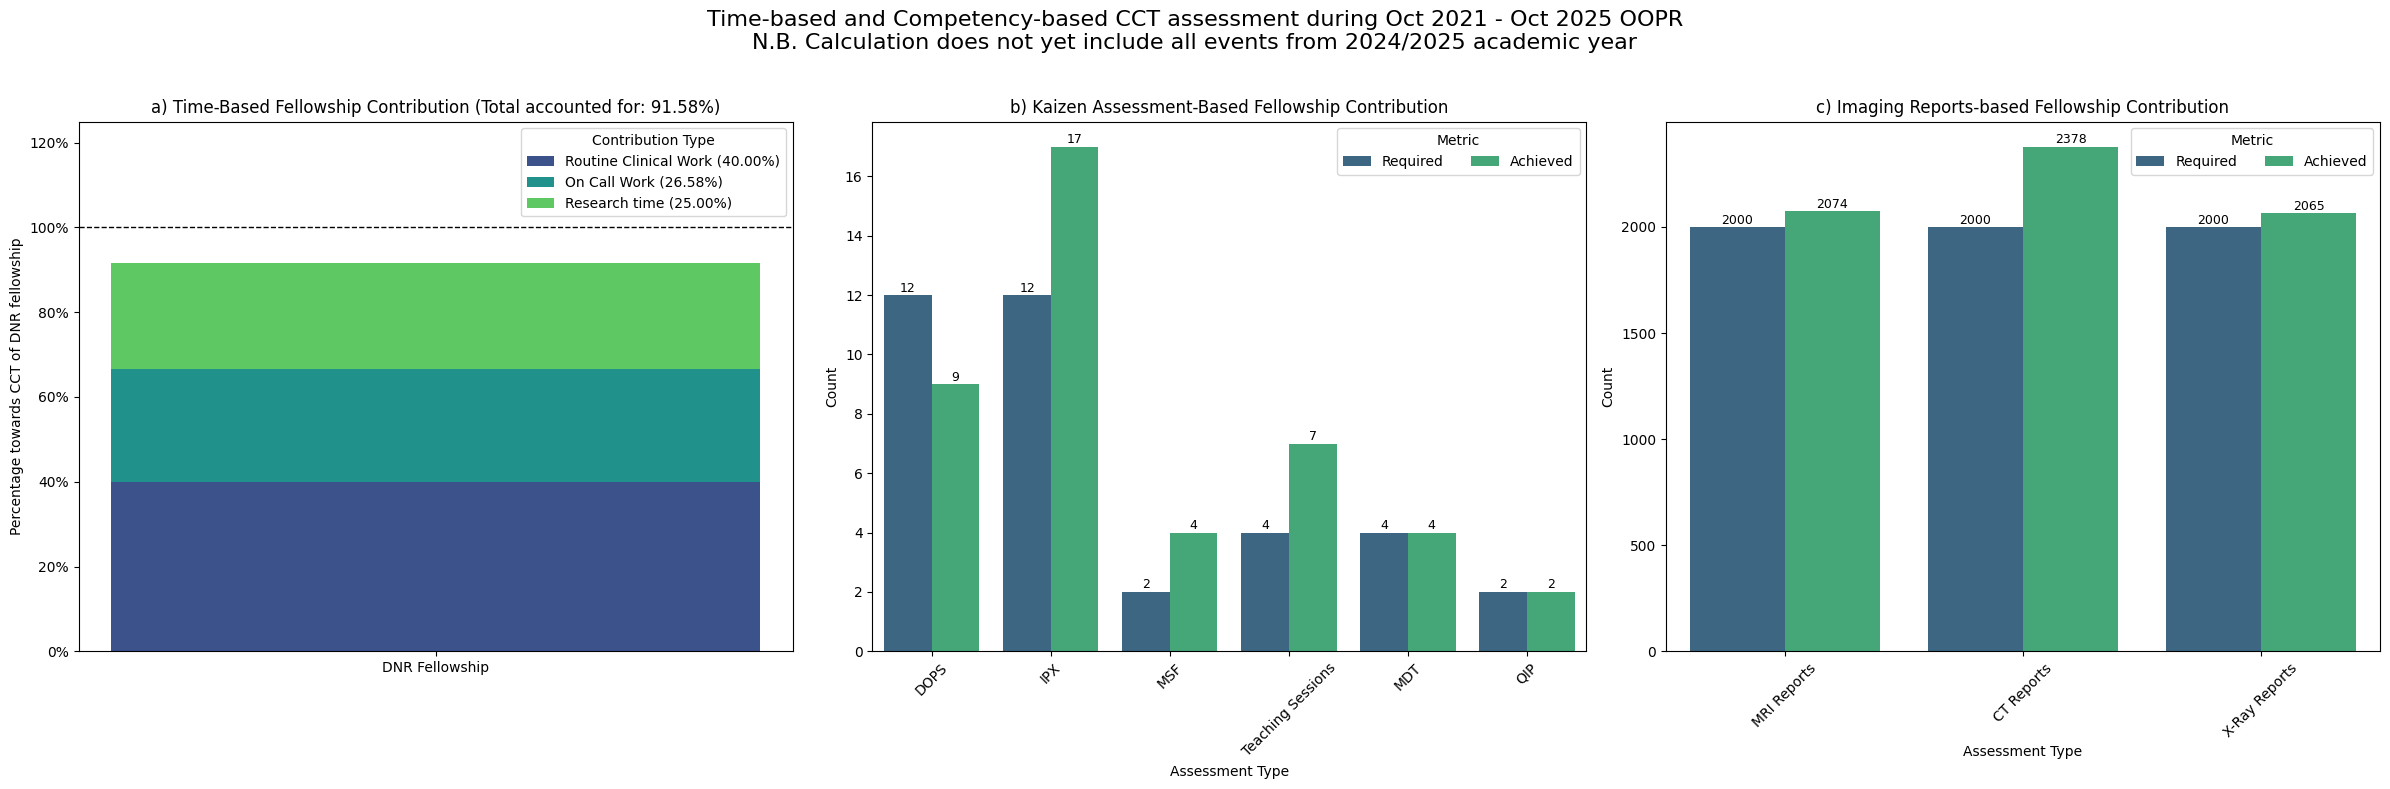

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # Explicit import for FuncFormatter

# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8)) # Adjusted figsize for better readability

# Add an overall title to the figure
fig.suptitle('Time-based and Competency-based CCT assessment during Oct 2021 - Oct 2025 OOPR\nN.B. Calculation does not yet include all events from 2024/2025 academic year', fontsize=16)

# --- First subplot: Time-Assessed Fellowship Contribution (replicates cell 6's plot) ---
ax1 = axs[0]
# Use existing variables from notebook state: plot_df, bar_width, total_proportion

# Define a palette for the first plot using "viridis"
# plot_df is defined in cell 6 and has 3 rows.
plot1_palette = sns.color_palette("viridis", n_colors=len(plot_df))

# Re-calculate cumulative sum for plotting the stacked bar
cumulative_proportion = 0.0
# Using new loop variable names to avoid conflict with any global loop variables from cell 6
for i_loop, row_data in plot_df.iterrows():
    label_text_data = f"{row_data['Contribution Type']} ({row_data['Proportion']:.2%})"
    ax1.bar('DNR Fellowship', row_data['Proportion'], bottom=cumulative_proportion, label=label_text_data, color=plot1_palette[i_loop], width=bar_width)
    cumulative_proportion += row_data['Proportion']

ax1.axhline(1, color='black', linestyle='--', linewidth=1)
ax1.set_ylabel('Percentage towards CCT of DNR fellowship')

# Use total_proportion for the title (this variable is available from cell 6)
title_text_ax1 = f'a) Time-Based Fellowship Contribution (Total accounted for: {total_proportion:.2%})'
ax1.set_title(title_text_ax1)

# Format y-axis as percentage
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax1.legend(title="Contribution Type", ncol=1)

# Replicate y-axis scaling from cell 6 using available 'total_proportion'
ax1.set_ylim(0, 1.25)


# --- Second subplot: Competency Assessments (Non-Imaging) ---
ax2 = axs[1]
assessment_types_subplot2 = ['DOPS', 'IPX', 'MSF', 'Teaching Sessions', 'MDT', 'QIP']
# competency_df is available from cell 10
competency_df_subplot2 = competency_df.loc[assessment_types_subplot2].reset_index()
competency_df_subplot2_melted = competency_df_subplot2.melt(id_vars='Assessment Type', var_name='Metric', value_name='Count')

sns.barplot(x='Assessment Type', y='Count', hue='Metric', data=competency_df_subplot2_melted, ax=ax2, palette="viridis")
ax2.set_title('b) Kaizen Assessment-Based Fellowship Contribution')
ax2.set_ylabel('Count')
ax2.set_xlabel('Assessment Type')
ax2.tick_params(axis='x', rotation=45) # Rotate labels
ax2.legend(title='Metric', ncol=3)

# Add value labels on bars
for p in ax2.patches:
    if p.get_height() > 0:
        ax2.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', 
                    xytext=(0, 5), textcoords='offset points')


# --- Third subplot: Competency Assessments (Imaging Reports) ---
ax3 = axs[2]
assessment_types_subplot3 = ['MRI Reports', 'CT Reports', 'X-Ray Reports']
# competency_df is available from cell 10
competency_df_subplot3 = competency_df.loc[assessment_types_subplot3].reset_index()
competency_df_subplot3_melted = competency_df_subplot3.melt(id_vars='Assessment Type', var_name='Metric', value_name='Count')

sns.barplot(x='Assessment Type', y='Count', hue='Metric', data=competency_df_subplot3_melted, ax=ax3, palette="viridis")
# ax3.axhline(2000, color='black', linestyle='--') # Added horizontal line
ax3.set_title('c) Imaging Reports-based Fellowship Contribution')
ax3.set_ylabel('Count')
ax3.set_xlabel('Assessment Type')
ax3.tick_params(axis='x', rotation=45) # Rotate labels
ax3.legend(title='Metric', ncol=3)

# Add value labels on bars
for p in ax3.patches:
    if p.get_height() > 0:
        ax3.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(rect=[0, 0, 1, 0.96]) # rect=[left, bottom, right, top]
plt.show()

# Save the figure
fig.savefig('cct_assessment_summary.png', dpi=600, bbox_inches='tight')